In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("medical_examination.csv")

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df['overweight'] = df['weight']/((df['height']/100) ** 2)
df.loc[df.overweight <= 25, 'overweight'] = 0
df.loc[df.overweight > 25, 'overweight'] = 1

In [5]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

df.loc[df.cholesterol == 1, 'cholesterol'] = 0
df.loc[df.cholesterol > 1, 'cholesterol'] = 1
df.loc[df.gluc == 1, 'gluc'] = 0
df.loc[df.gluc > 1, 'gluc'] = 1

In [68]:
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.

df_cat = df.melt(id_vars='cardio',
                value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

,cardio,variable,value
0,0,cholesterol,0.0
1,1,cholesterol,1.0
2,1,cholesterol,1.0
3,1,cholesterol,0.0
4,0,cholesterol,0.0


In [69]:
df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index = False).value_counts()
df_cat.rename(columns={'count':'total'}, inplace = True)

,cardio,variable,value,total
0,0,active,0.0,6378
1,0,active,1.0,28643
2,0,alco,0.0,33080
3,0,alco,1.0,1941
4,0,cholesterol,0.0,29330
5,0,cholesterol,1.0,5691
6,0,gluc,0.0,30894
7,0,gluc,1.0,4127
8,0,overweight,0.0,15915
9,0,overweight,1.0,19106


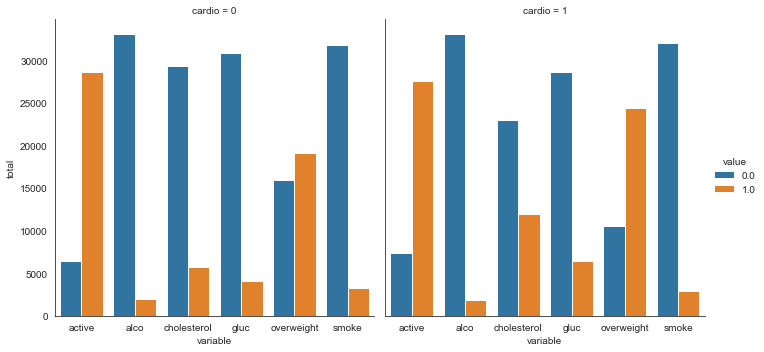

In [70]:
sns.set_style('white')

sns.catplot(x='variable', y='total', hue='value',
            data=df_cat,
            kind='bar',
            col='cardio')

In [27]:
df_heat = df[(df['ap_lo'] <= df['ap_hi'])&
             (df['height'] >= df['height'].quantile(0.025))&
             (df['height'] <= df['height'].quantile(0.975))&
             (df['weight'] >= df['weight'].quantile(0.025))&
             (df['weight'] <= df['weight'].quantile(0.975))]

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0.0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1.0
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1.0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1.0


<AxesSubplot:>

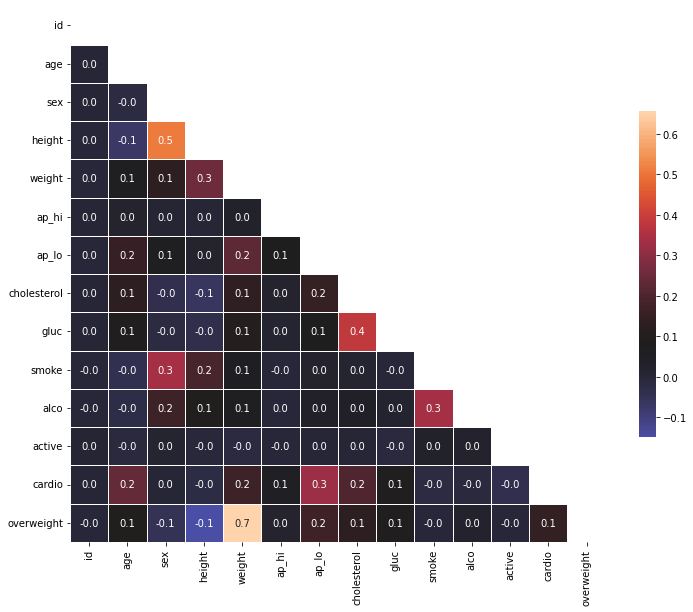

In [33]:
corr = df_heat.corr(method='pearson')

mask = np.triu(corr)

fig, ax = plt.subplots(figsize=(12,12))

sns.heatmap(corr, 
            linewidths=1, 
            annot = True, 
            square = True, 
            mask = mask, 
            fmt = ".1f", 
            center = 0.08, 
            cbar_kws = {"shrink":0.5})

